# PCA Pokemon Unite

En este código se aplica un análisis PCA a las estadísticas propias de los personajes disponibles en el videojuego **Pokemon Unite**. La finalidad de este análisis es conocer quienes son los mejores y peores personajes del juego al inicio de la partida y al final de la partida.

Los datos fueron tomados de la siguiente [página](https://unite-db.com/stats/). Los datos fueron consultados el día 11 de octubre de 2021.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

import seaborn as sns

In [ ]:
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = (300)

In [ ]:
pokemons = pd.read_excel('pkmn_stats.xlsx')
pokemons = pokemons.set_index('Pokemon')
pokemons.head(-1)

,HP,Attack,Defense,SpAttack,SpDefense,HP(15),Attack(15),Defense(15),SpAttack(15),SpDefense(15)
Pokemon,,,,,,,,,,
Absol,3000,170,52,20,36,6000,620,259,118,180
Blastoise,3225,150,100,50,70,9800,292,599,412,420
Blissey,3278,130,40,40,60,10000,310,200,600,300
Charizard,3200,161,70,20,34,7700,463,350,114,269
Cinderace,3000,135,50,20,30,5400,418,250,119,149
Cramorant,3292,134,60,50,40,6301,286,300,739,200
Crustle,3300,175,97,20,67,9900,344,580,116,400
Eldegoss,3278,130,40,40,30,8002,310,200,670,149
Garchomp,3050,145,90,20,67,7750,496,472,114,367


## Parte 1: Estadísticas a nivel 1

Se aplica el análisis de las estadísticas al inicio de la partida.

In [ ]:
data1 = pokemons.drop(['HP(15)','Attack(15)','Defense(15)','SpAttack(15)','SpDefense(15)'], axis=1)
data1.head()

,HP,Attack,Defense,SpAttack,SpDefense
Pokemon,,,,,
Absol,3000,170,52,20,36
Blastoise,3225,150,100,50,70
Blissey,3278,130,40,40,60
Charizard,3200,161,70,20,34
Cinderace,3000,135,50,20,30


Text(0.5, 1.0, 'Matriz de correlaciones a nivel 1')

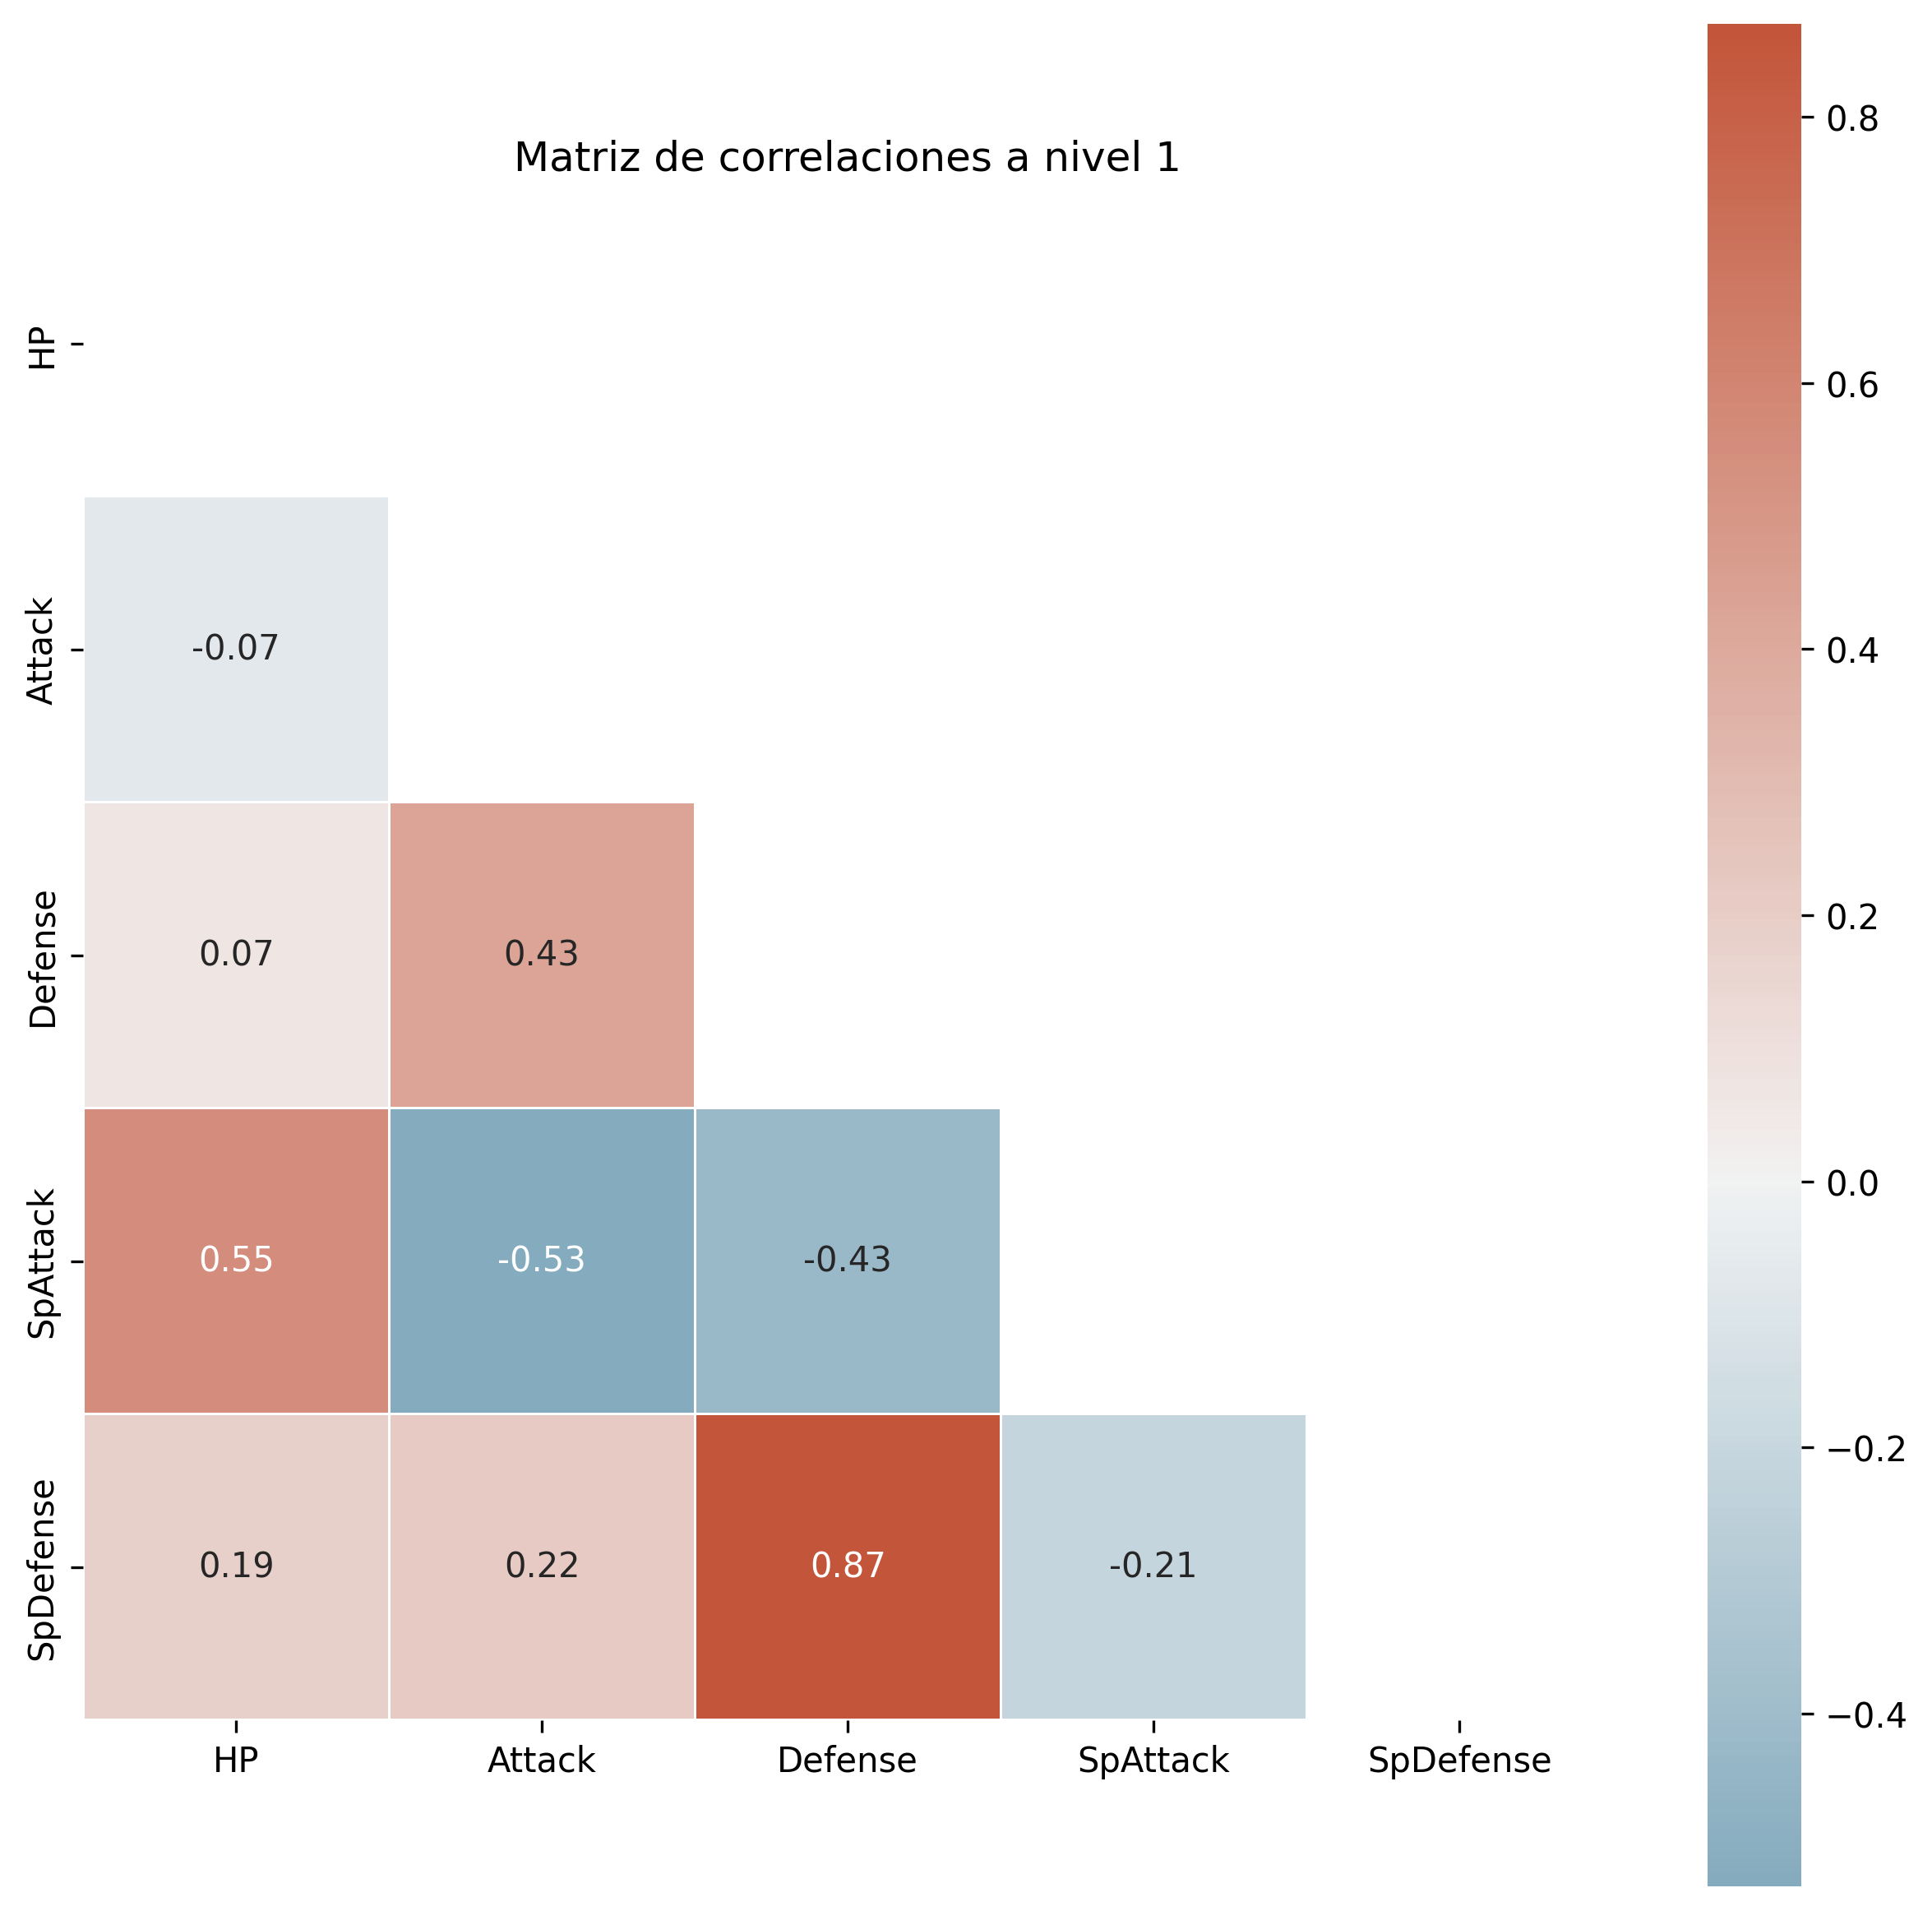

In [ ]:
# Gráfica de correlaciones

correlation_matrix = data1.corr().round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data=correlation_matrix, annot=True, mask=mask, cmap=cmap,
            center=0, square=True, linewidth=0.5, 
            # cbar_kws={"shrink":0.5}
            )
plt.title('Matriz de correlaciones a nivel 1')

In [ ]:
scaled_data = preprocessing.StandardScaler().fit_transform(data1)
pca = PCA()
# pca = PCA(0.90)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data) # esta variable se usa para la funcion get_important_features()

In [ ]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

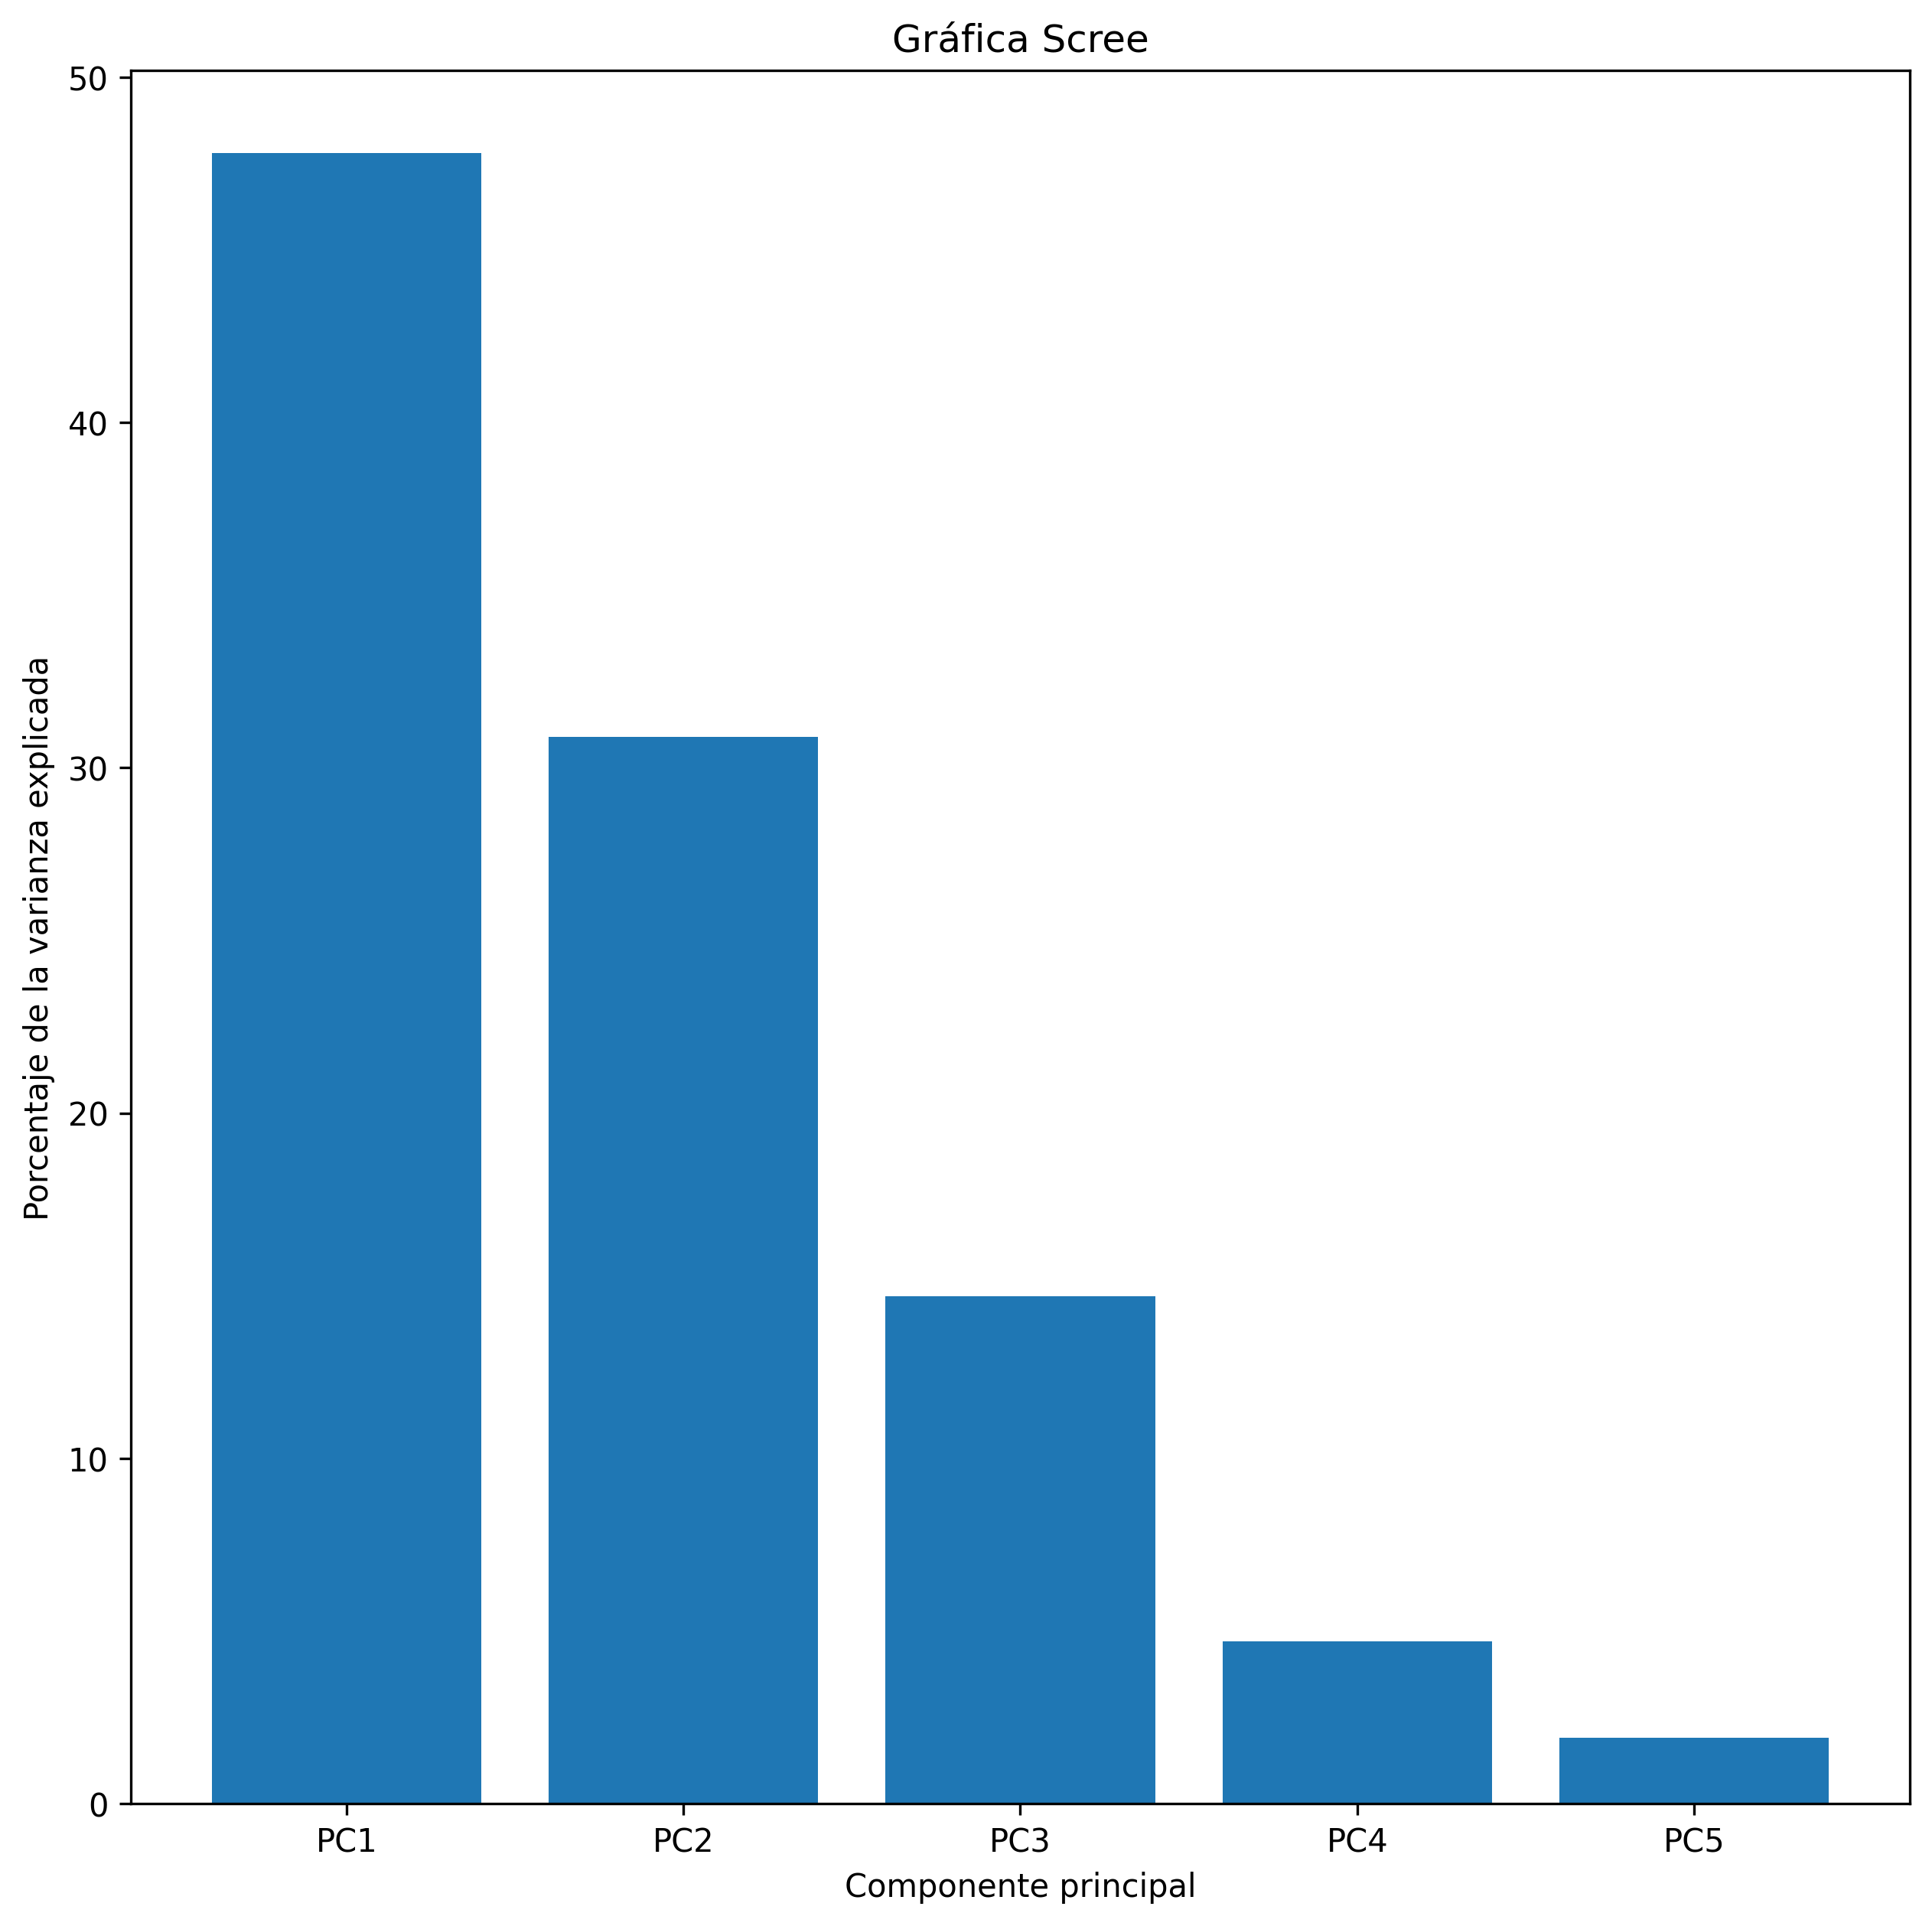

In [ ]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Porcentaje de la varianza explicada')
plt.xlabel('Componente principal')
plt.title('Gráfica Scree')
plt.show()

In [ ]:
pca_df = pd.DataFrame(pca_data,index=pokemons.index, columns=labels)

In [ ]:
def draw_vectors(transformed_features, components_, columns):
    """
    This funtion will project your *original* features
    onto your principal component feature-space, so that you can
    visualize how "important" each one was in the
    multi-dimensional scaling
    """

    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ax = plt.axes()

    for i in range(num_columns):
    # Use an arrow to project each original feature as a
    # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

In [ ]:
import math

def get_important_features(transformed_features, components_, columns):
  """
  Esta función regresará las características más importantes
  para determinar cuáles tienen el mayor impacto en un arreglo
  multidimensional
  """
  num_columns = len(columns)

  # Se escalan los componentes principales por el valor
  # máximo en el set transformado perteneciente a ese componente
  xvector = components_[0] * max(transformed_features[:,0])
  yvector = components_[1] * max(transformed_features[:,1])

  # Acomoda cada columna de acuerdo a su longitu. Estos son las
  # columnas 'originales', no los componentes principales
  important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
  important_features = sorted(zip(important_features.values(), important_features.keys()),
                              reverse=True)
  print("Features by importance:\n", important_features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


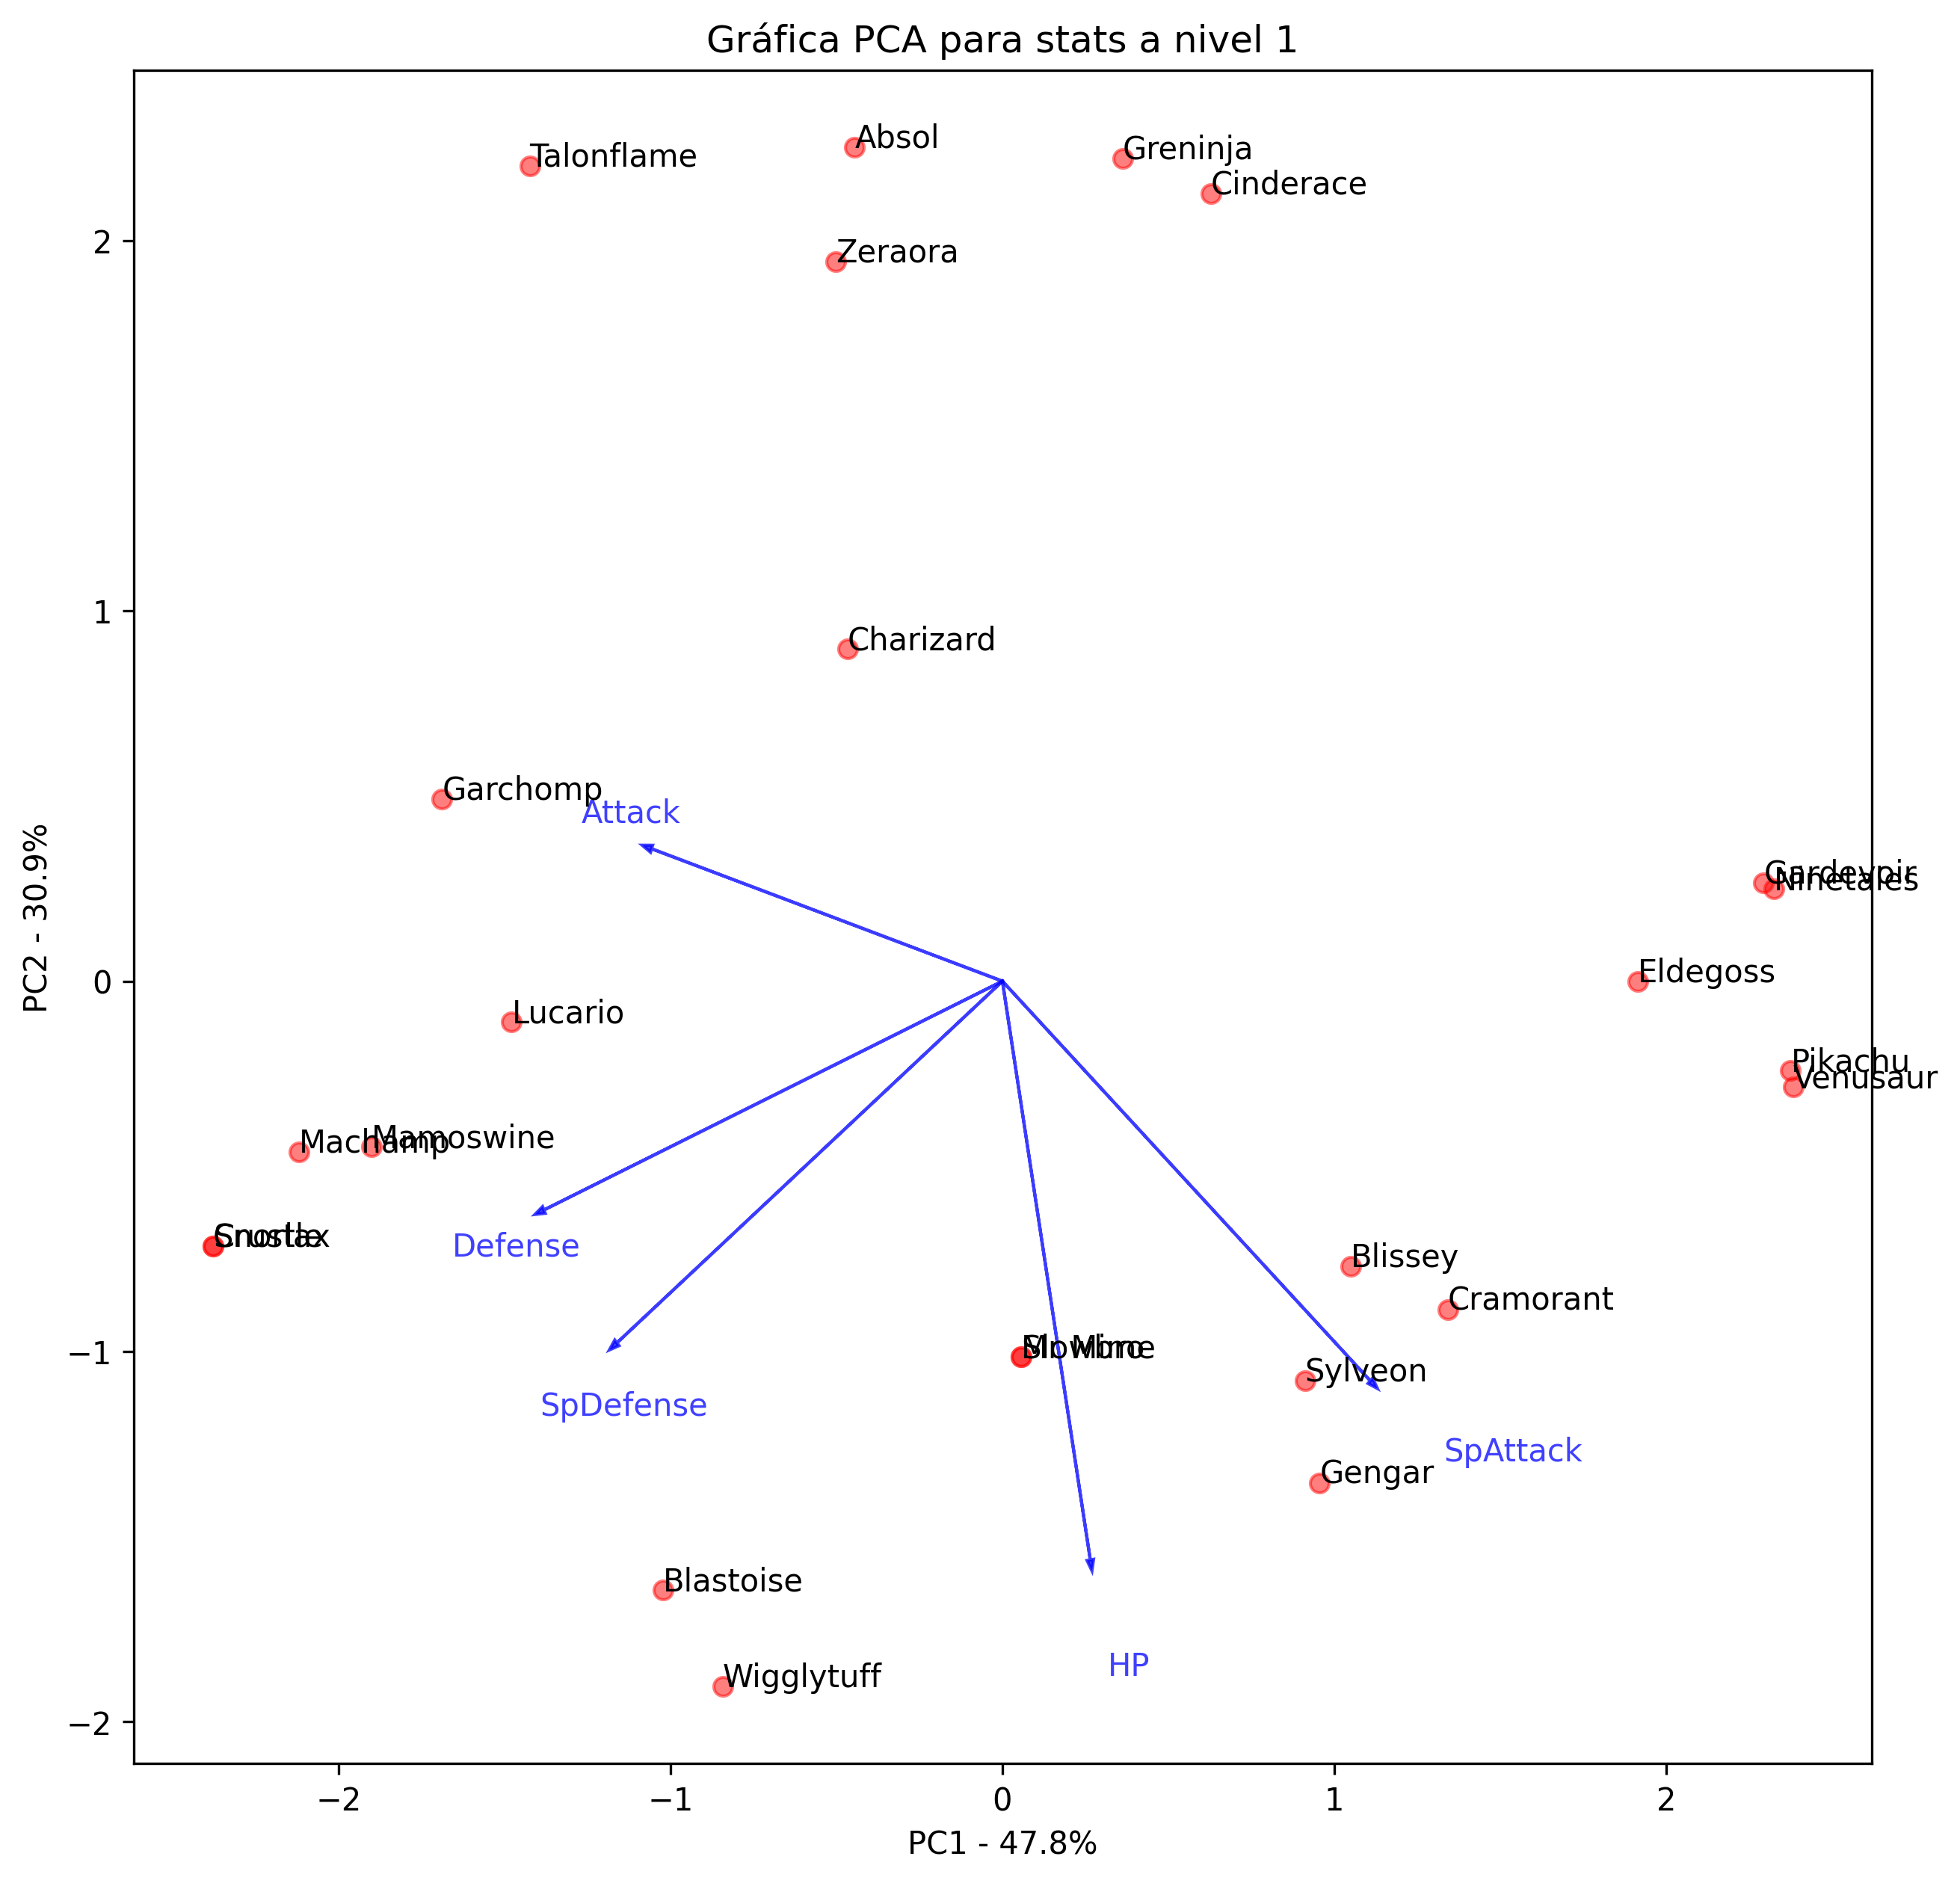

In [ ]:
plt.scatter(pca_df.PC1, pca_df.PC2,c='r', alpha=0.5)
plt.title('Gráfica PCA para stats a nivel 1')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

ax = draw_vectors(pca_data, pca.components_, data1.columns.values)

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))


plt.show()

Para conocer las características más importantes del juego

In [ ]:
get_important_features(pca_data, pca.components_, data1.columns.values)

Features by importance:
 [(1.58475104221126, 'HP'), (1.5468074589737144, 'SpAttack'), (1.5173629725975795, 'SpDefense'), (1.5131039394552928, 'Defense'), (1.1157276309041595, 'Attack')]


Según el análisis PCA, la característica más importante dentro del juego es el HP del personaje; la característica menos importante sería el Ataque. El orden de importancia sería el siguiente:
1. HP
2. Special Attack
3. Special Defense
4. Defense
5. Attack

In [ ]:
# Correlaciones entre las características
components = pd.DataFrame(pca.components_, columns= data1.columns)
components

,HP,Attack,Defense,SpAttack,SpDefense
0,0.111167,-0.443776,-0.579966,0.465364,-0.487629
1,-0.694014,0.158787,-0.274386,-0.479264,-0.433762
2,0.462025,0.787705,-0.191485,0.026243,-0.358747
3,-0.540683,0.380819,0.050867,0.729709,0.166059
4,0.013469,0.111123,-0.741012,-0.143450,0.646370


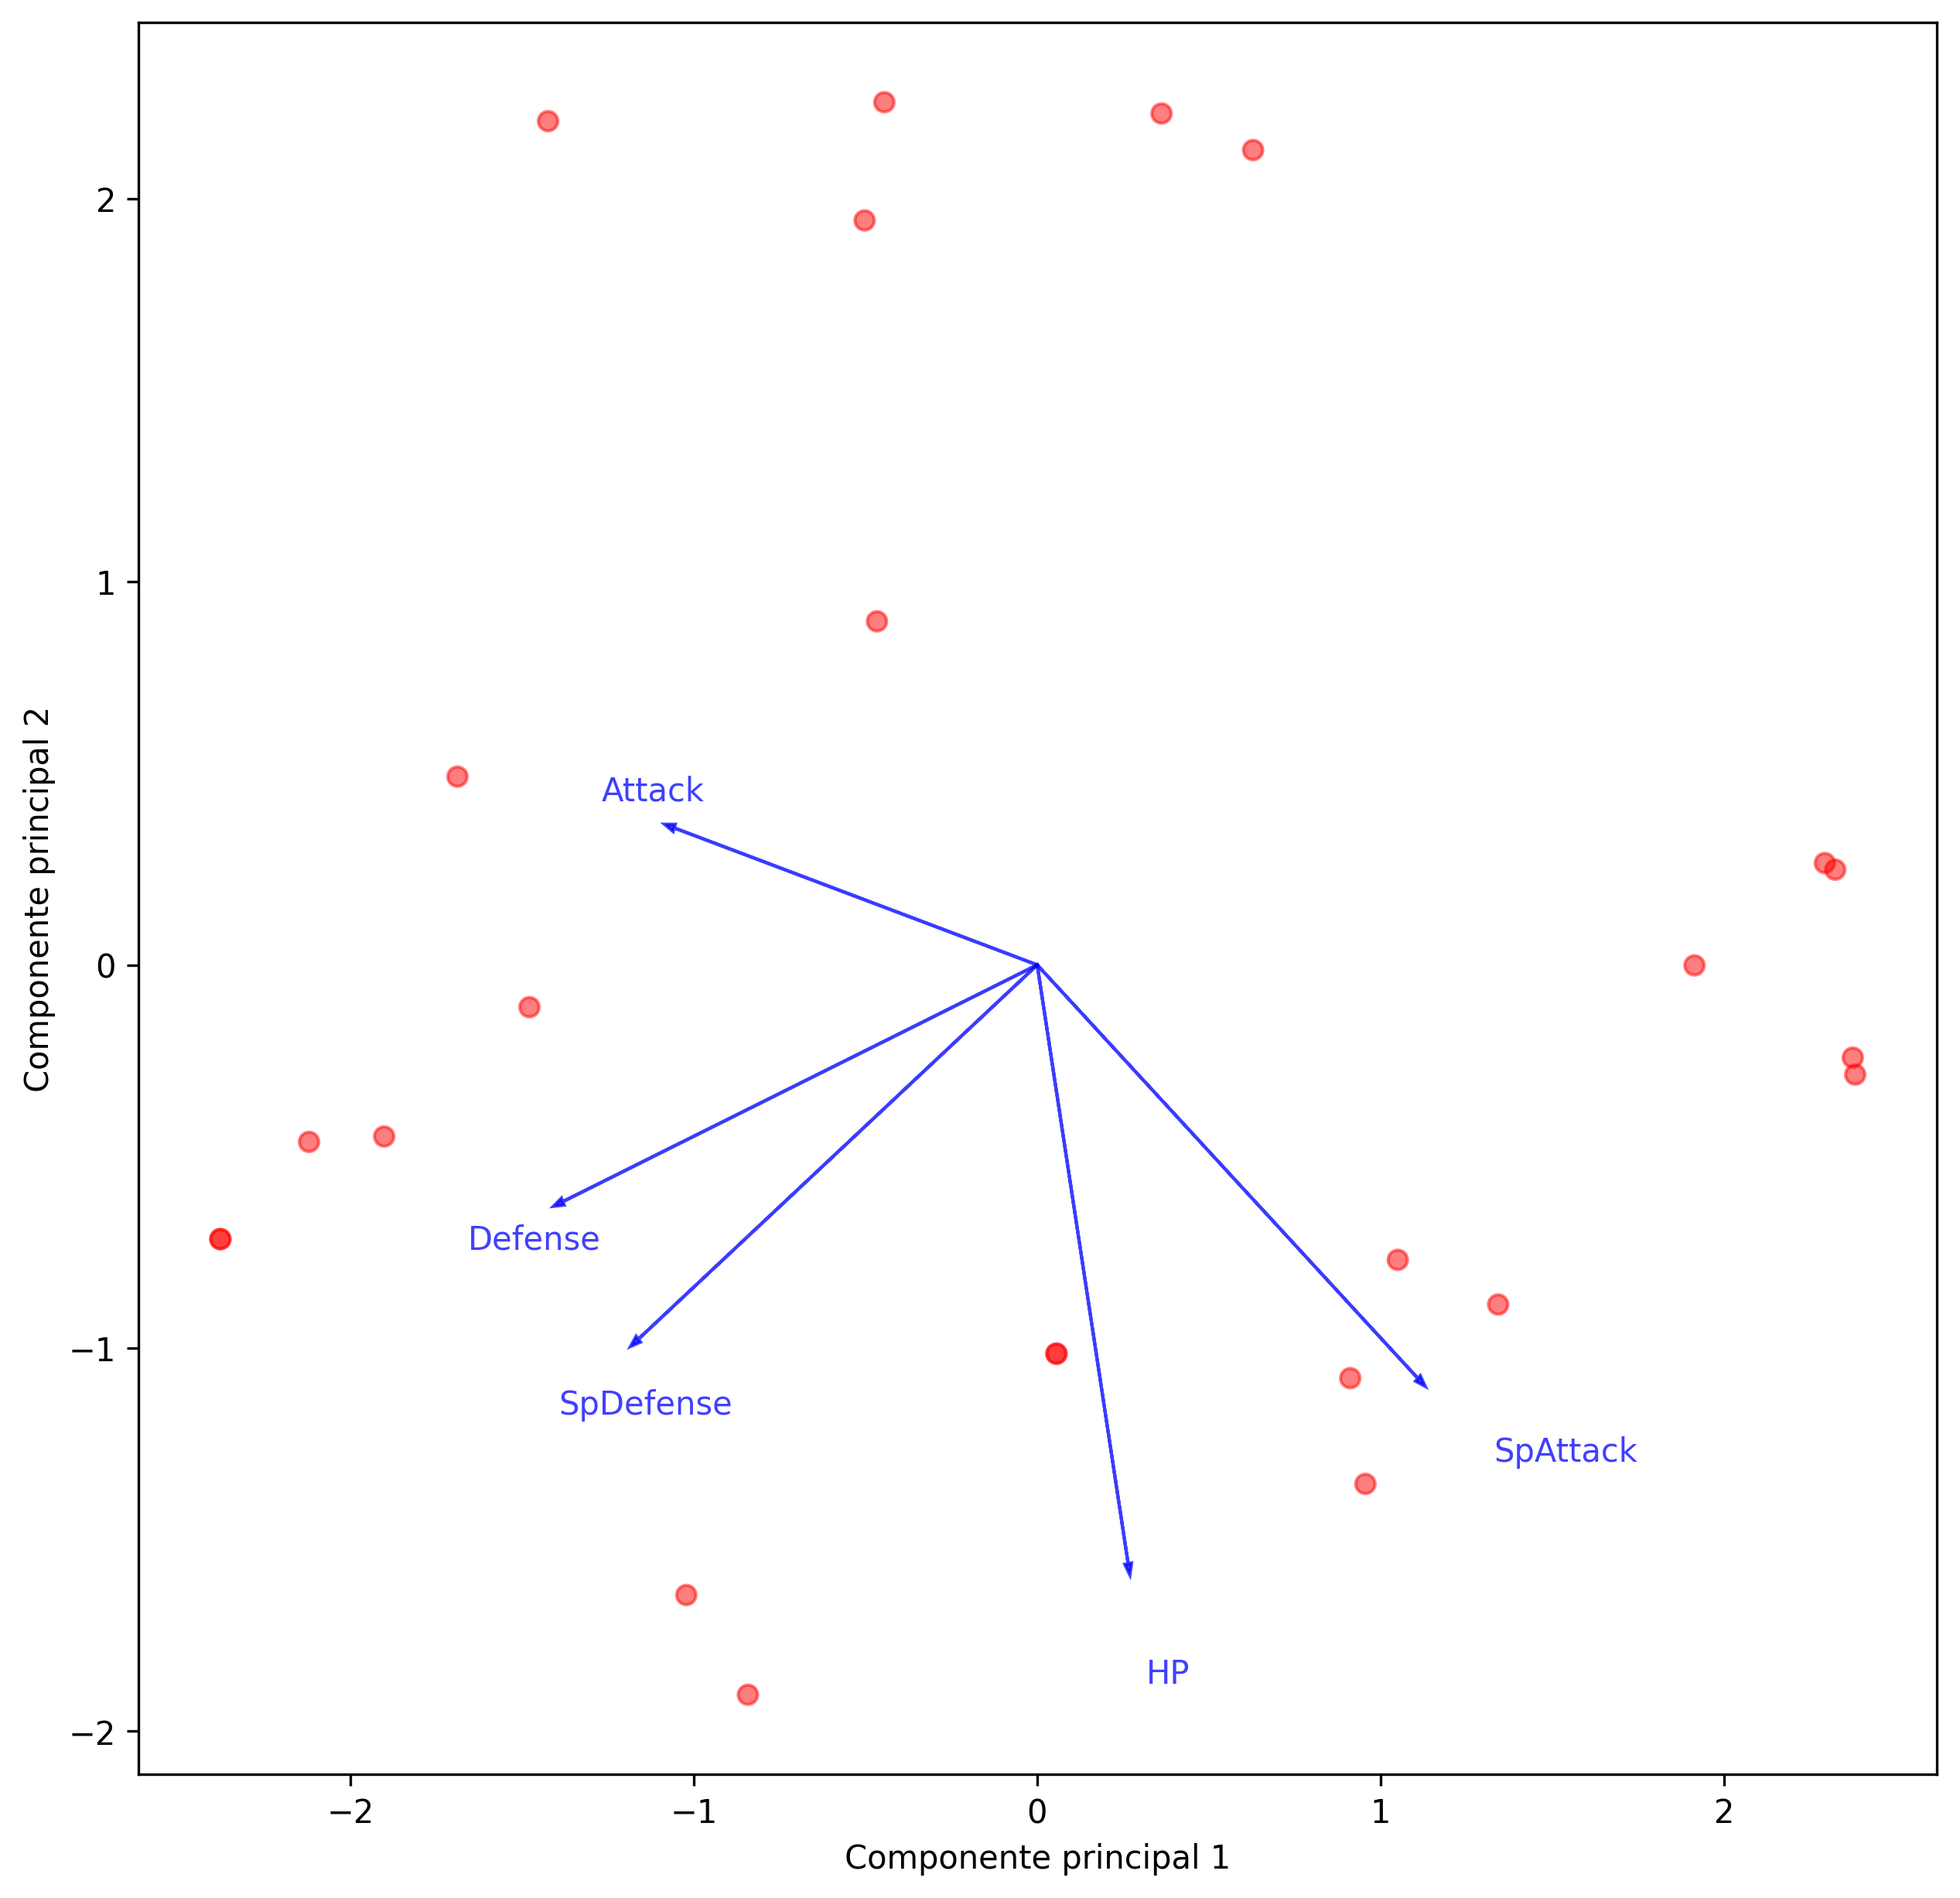

In [ ]:
ax = draw_vectors(pca_data, pca.components_, data1.columns.values)
T_df = pca_df
T_df.columns = ['Componente1', 'Componente2','Componente3','Componente4','Componente5']

T_df['color'] = 'r'
# Mejores pokemon

# Peores pokemon

plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.scatter(T_df['Componente1'], T_df['Componente2'], color=T_df['color'], alpha=0.5)

plt.show()

## Parte 2: Estadísticas a nivel 15

Ahora se comparan las estadísticas de los personajes en el nivel final del juego.

A ver si cambian los resultados o se mantienen.

In [ ]:
data2 = pokemons.drop(['HP','Attack','Defense','SpAttack','SpDefense'], axis=1)
data2.head()

,HP(15),Attack(15),Defense(15),SpAttack(15),SpDefense(15)
Pokemon,,,,,
Absol,6000,620,259,118,180
Blastoise,9800,292,599,412,420
Blissey,10000,310,200,600,300
Charizard,7700,463,350,114,269
Cinderace,5400,418,250,119,149


Text(0.5, 1.0, 'Matriz de correlaciones a nivel 15')

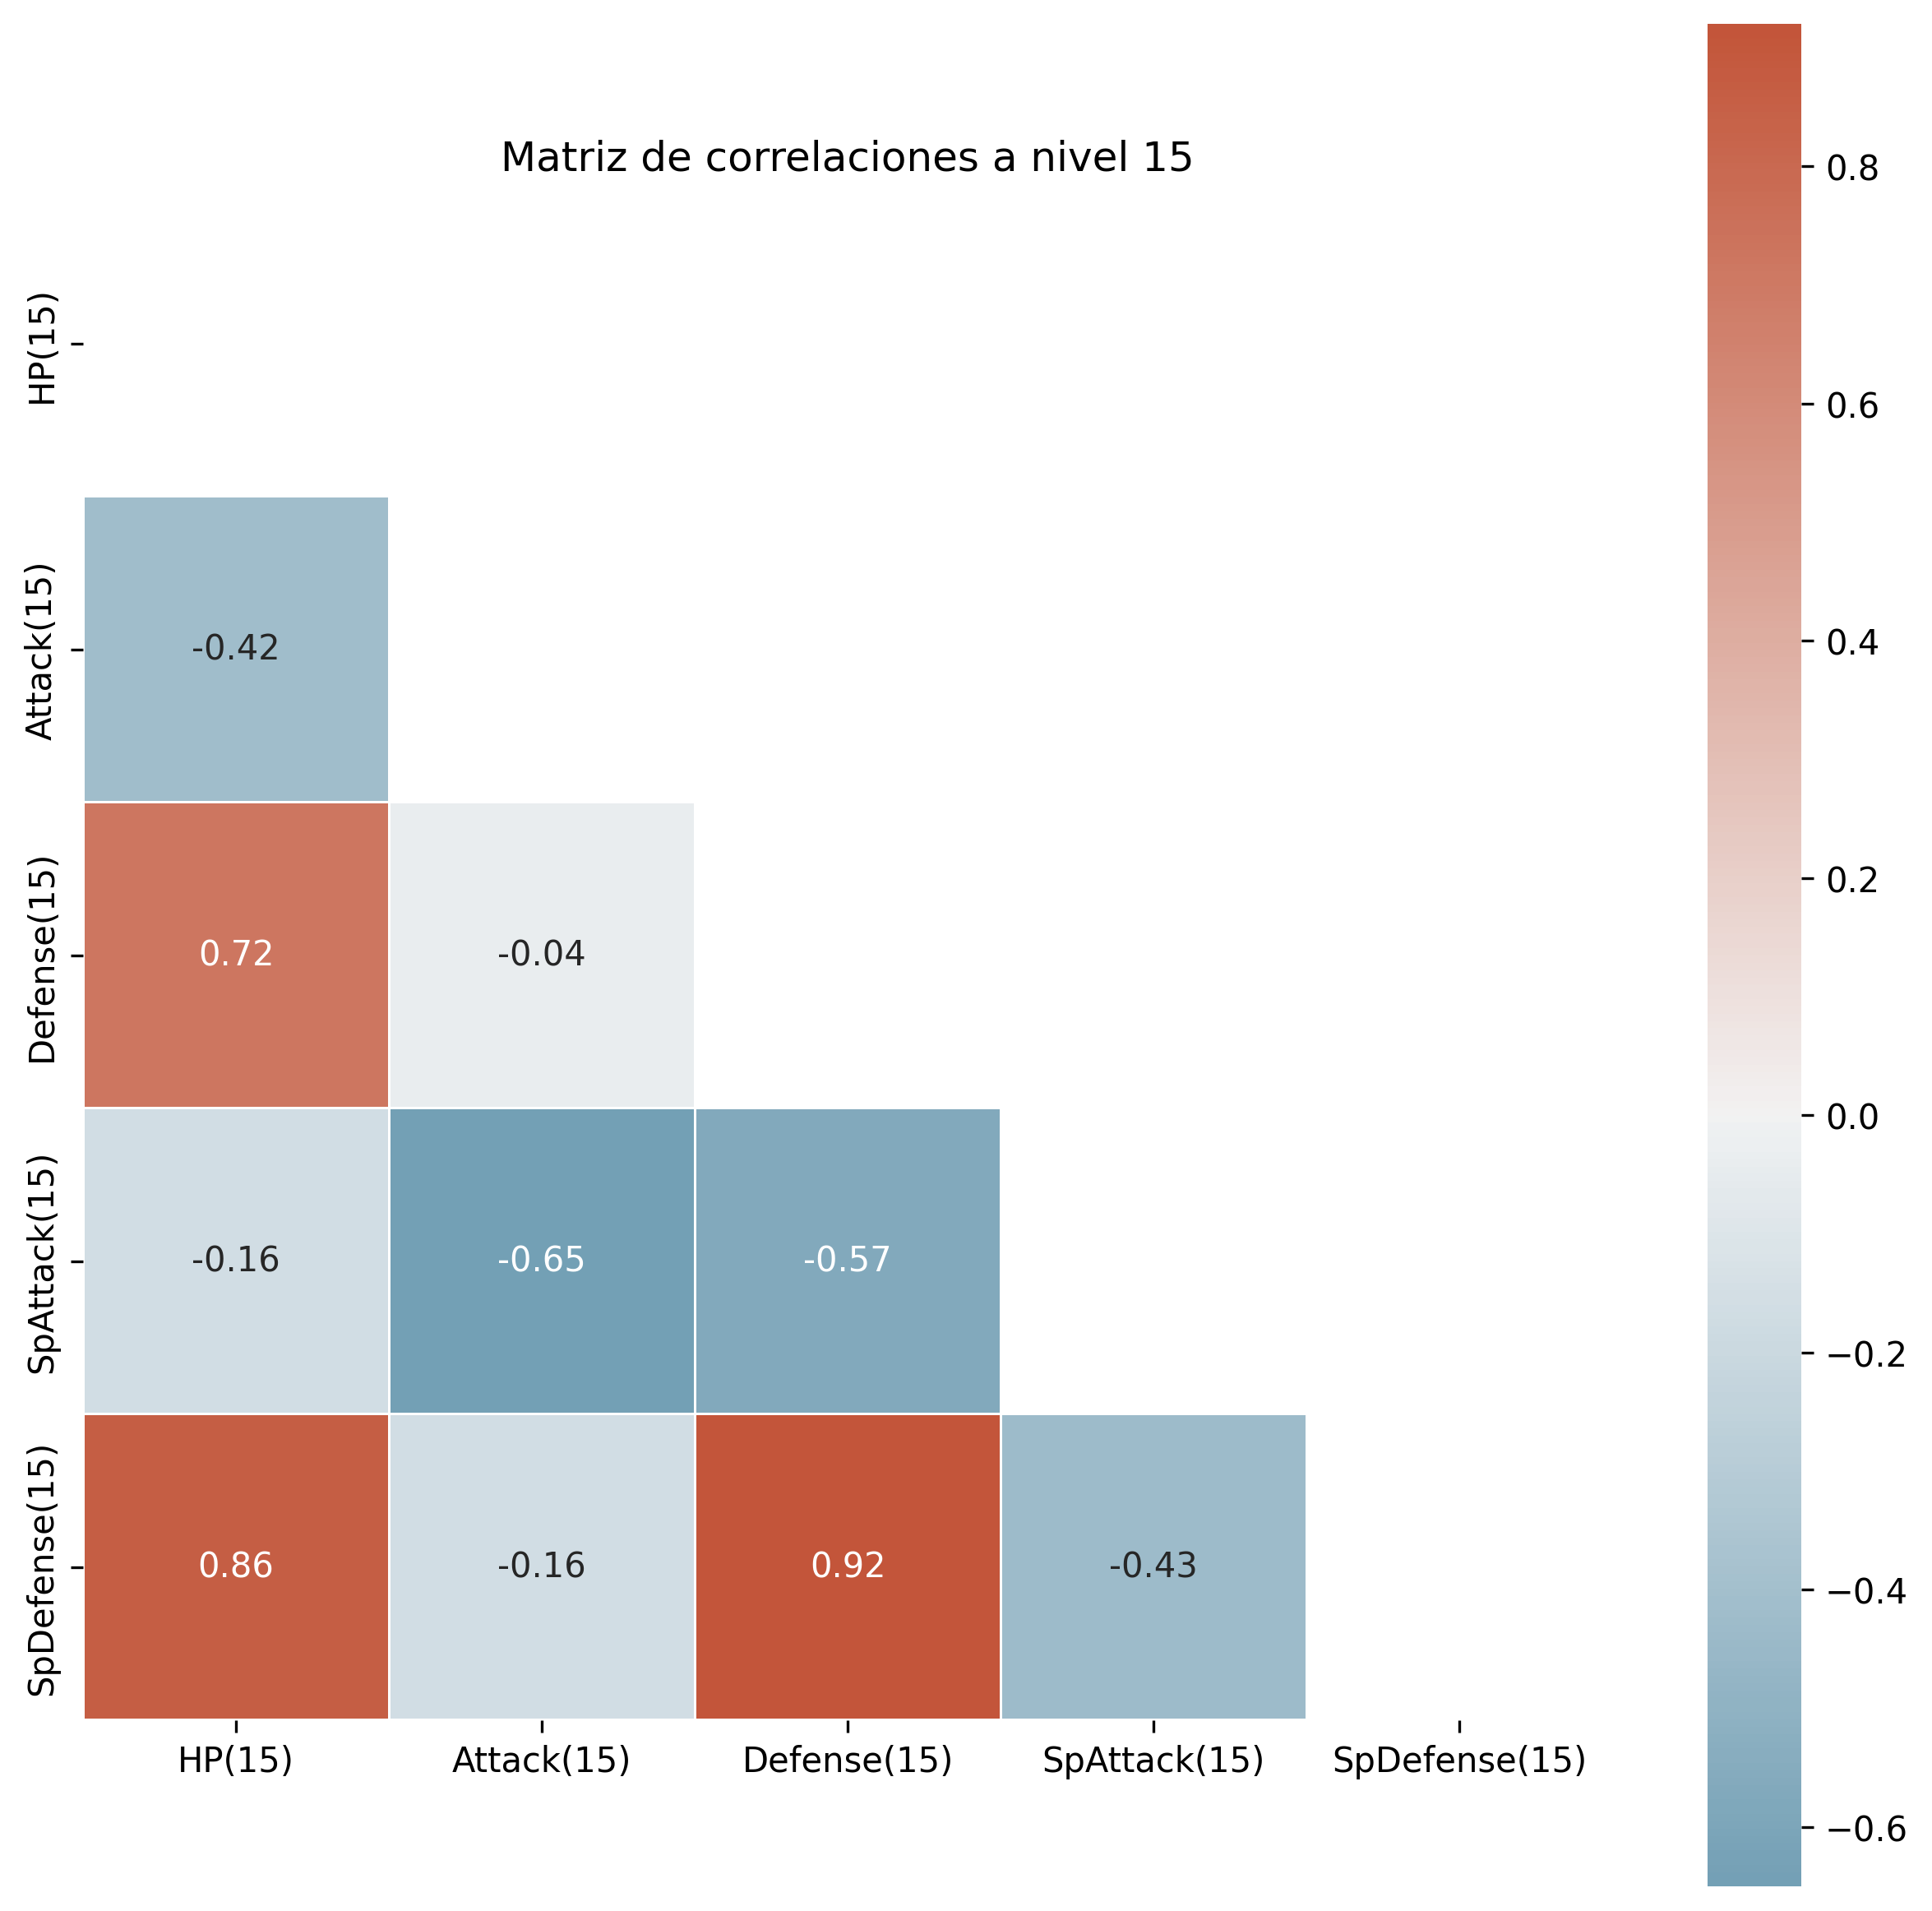

In [ ]:
# Gráfica de correlaciones

correlation_matrix = data2.corr().round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data=correlation_matrix, annot=True, mask=mask, cmap=cmap,
            center=0, square=True, linewidth=0.5, 
            # cbar_kws={"shrink":0.5}
            )
plt.title('Matriz de correlaciones a nivel 15')

In [ ]:
scaled_data2 = preprocessing.StandardScaler().fit_transform(data2)
pca2 = PCA()
# pca = PCA(0.90)
pca2.fit(scaled_data2)
pca_data2 = pca2.transform(scaled_data2) # esta variable se usa para la funcion get_important_features()

In [ ]:
per_var2 = np.round(pca2.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var2) + 1)]

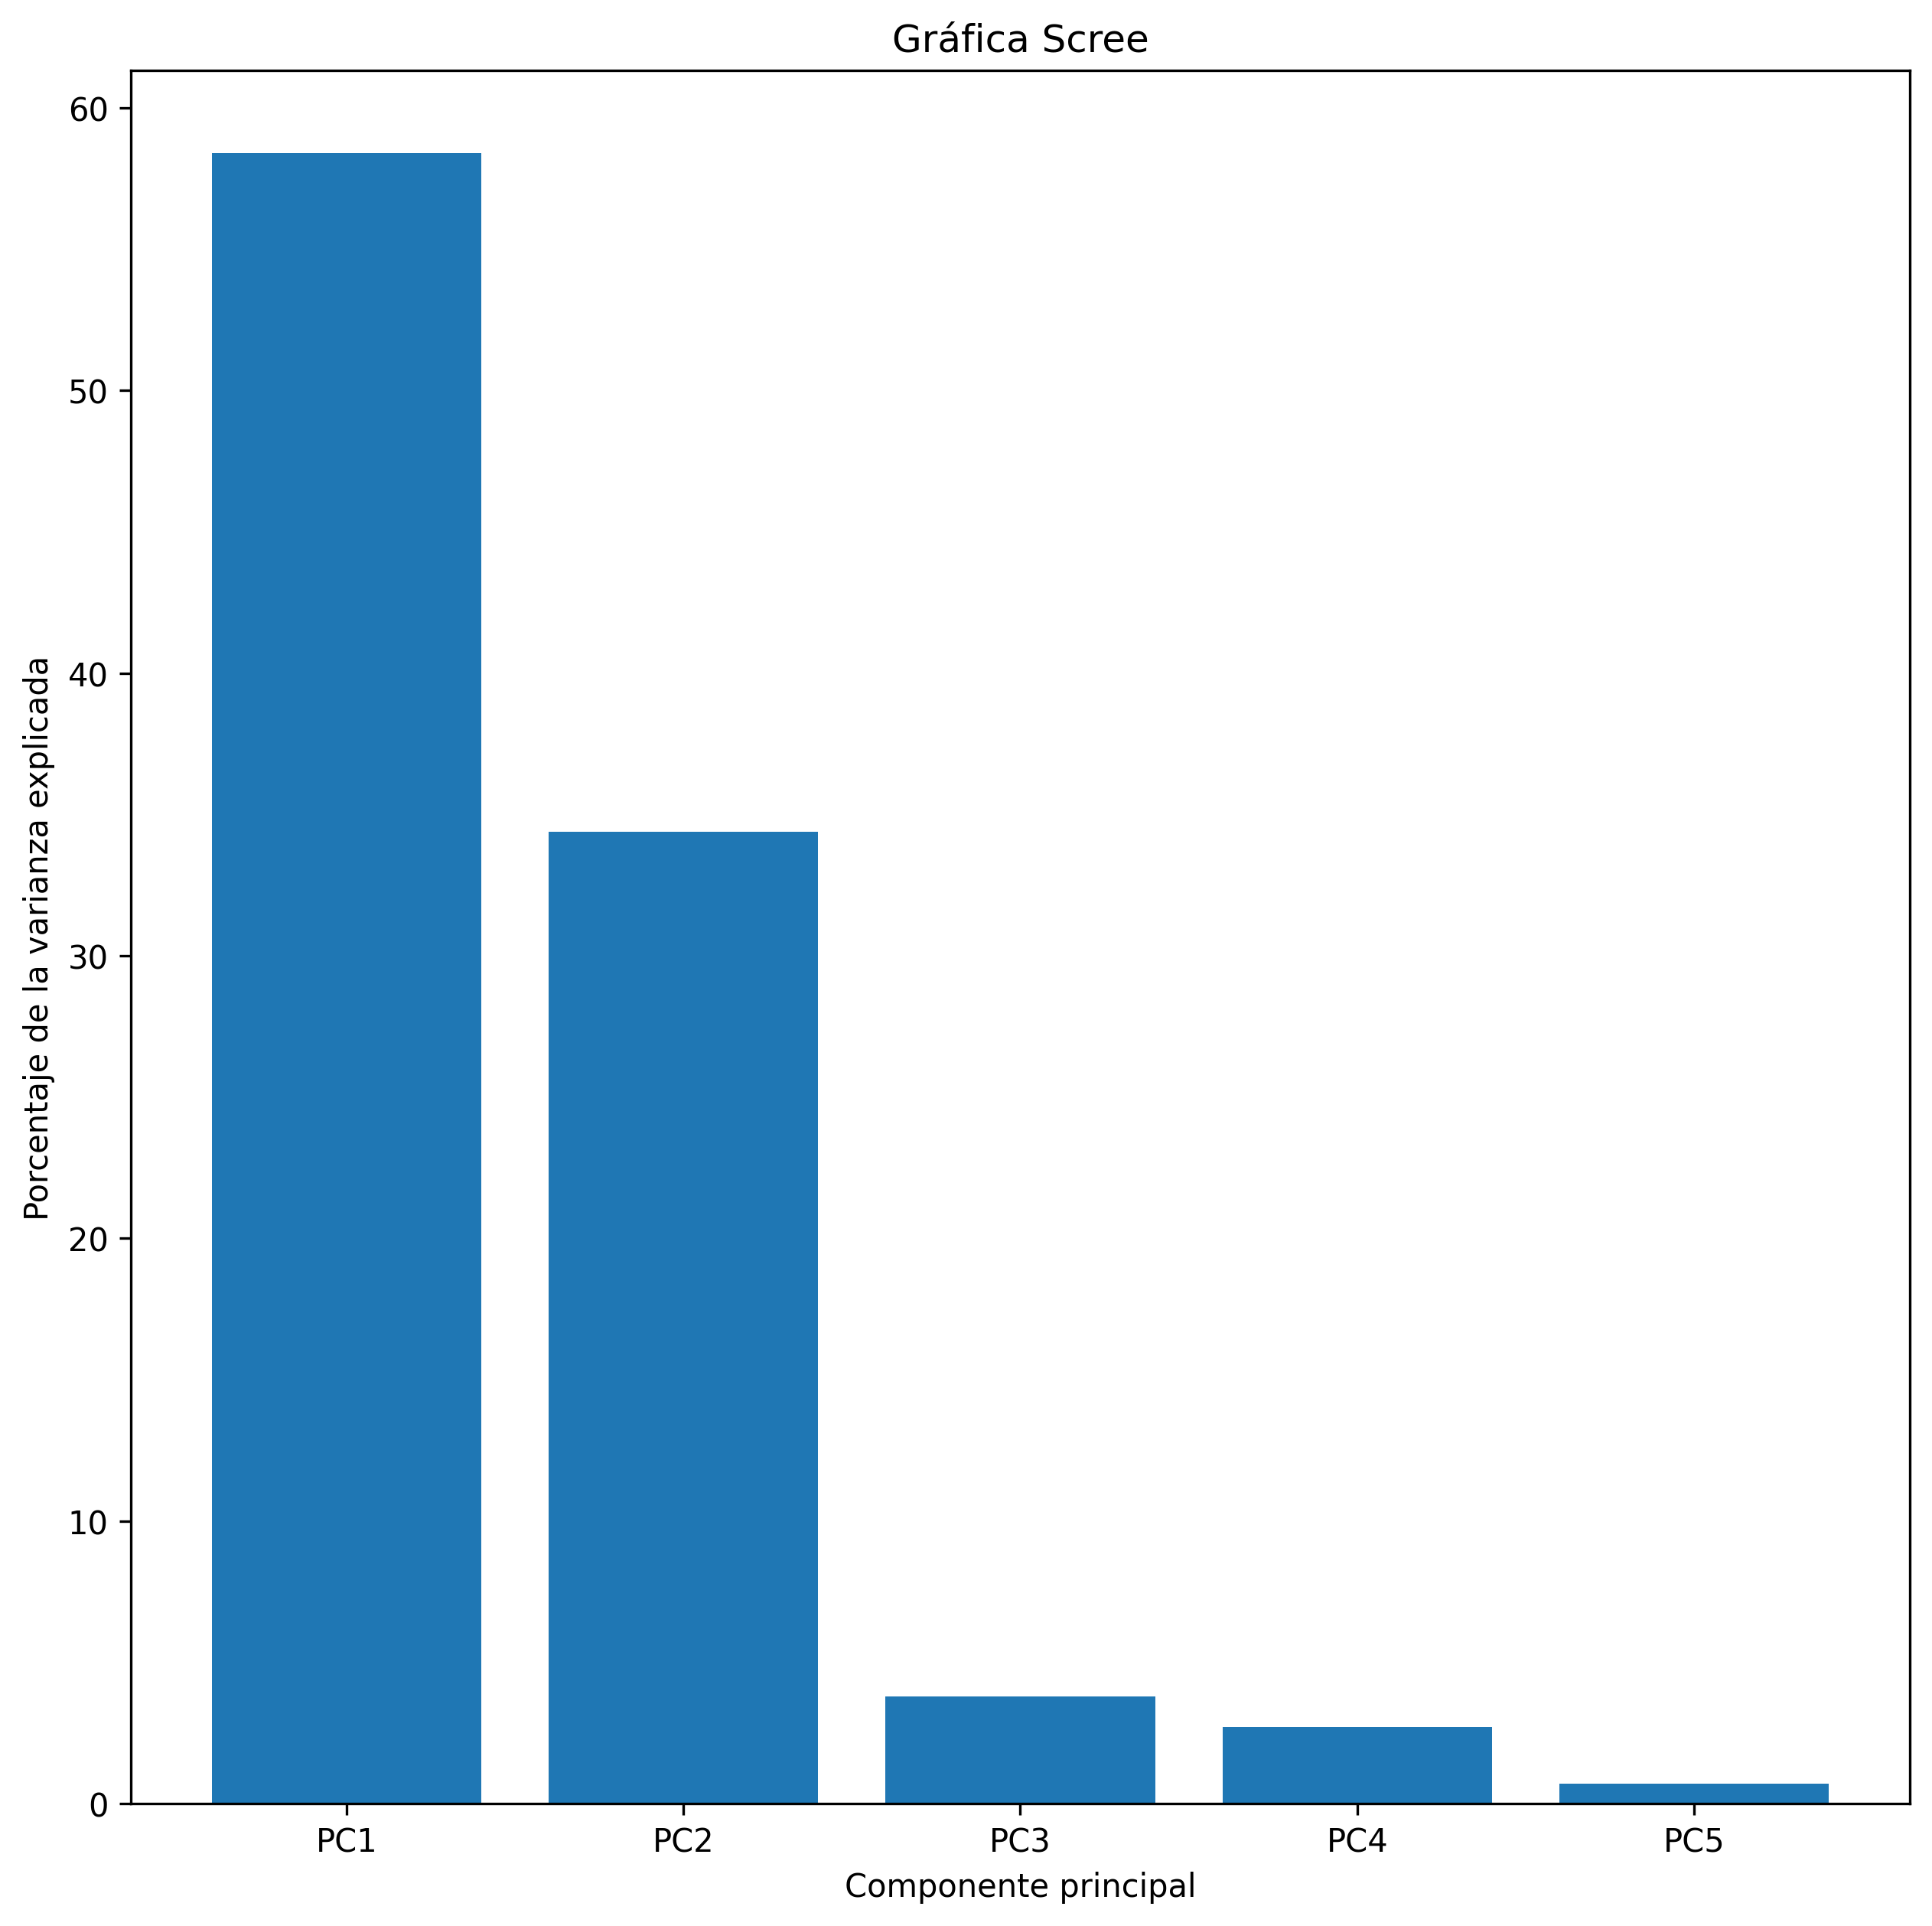

In [ ]:
# Gráfica scree de la varianza explicada de los componentes principales

plt.bar(x=range(1,len(per_var2)+1), height=per_var2, tick_label=labels)
plt.ylabel('Porcentaje de la varianza explicada')
plt.xlabel('Componente principal')
plt.title('Gráfica Scree')
plt.show()

In [ ]:
pca_df2 = pd.DataFrame(pca_data2,index=pokemons.index, columns=labels)

In [ ]:
# Obtener las características más importantes para el análisis PCA

get_important_features(pca_data2, pca2.components_, data2.columns.values)

Features by importance:
 [(1.9380585456456938, 'Attack(15)'), (1.8242373086772268, 'SpAttack(15)'), (1.5807525079892137, 'HP(15)'), (1.568474899650566, 'SpDefense(15)'), (1.5313786990568026, 'Defense(15)')]


La importancia de las estadísticas cambia respecto al nivel 1. El orden de importancia sería el siguiente:
1. Attack
2. Special Attack
3. HP
4. Special Defense
5. Defense

Se puede observar que el *Ataque* se vuelve el aspecto más importante del juego, seguido por el ataque especial. La estadística del *HP* se desplaza hasta el tercer lugar. La *Defensa Especial* desciende un puesto respecto al inicio del juego. Mientras que la *Defensa*  pasa a ser la estadística menos importante en *late game* y es la que más bajó en el orden, pues pasó del primer lugar al último.

Lo que suponen estas importancias 

In [ ]:
# Correlaciones entre las características
components = pd.DataFrame(pca2.components_, columns= data2.columns)
components

,HP(15),Attack(15),Defense(15),SpAttack(15),SpDefense(15)
0,0.506071,-0.062003,0.558741,-0.315520,0.572977
1,-0.293629,0.730703,0.068632,-0.609143,-0.063949
2,0.711766,0.410961,-0.563120,0.085183,0.011854
3,-0.174392,0.525799,0.277875,0.711284,0.331636
4,-0.347348,-0.129903,-0.537382,-0.127322,0.746649


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


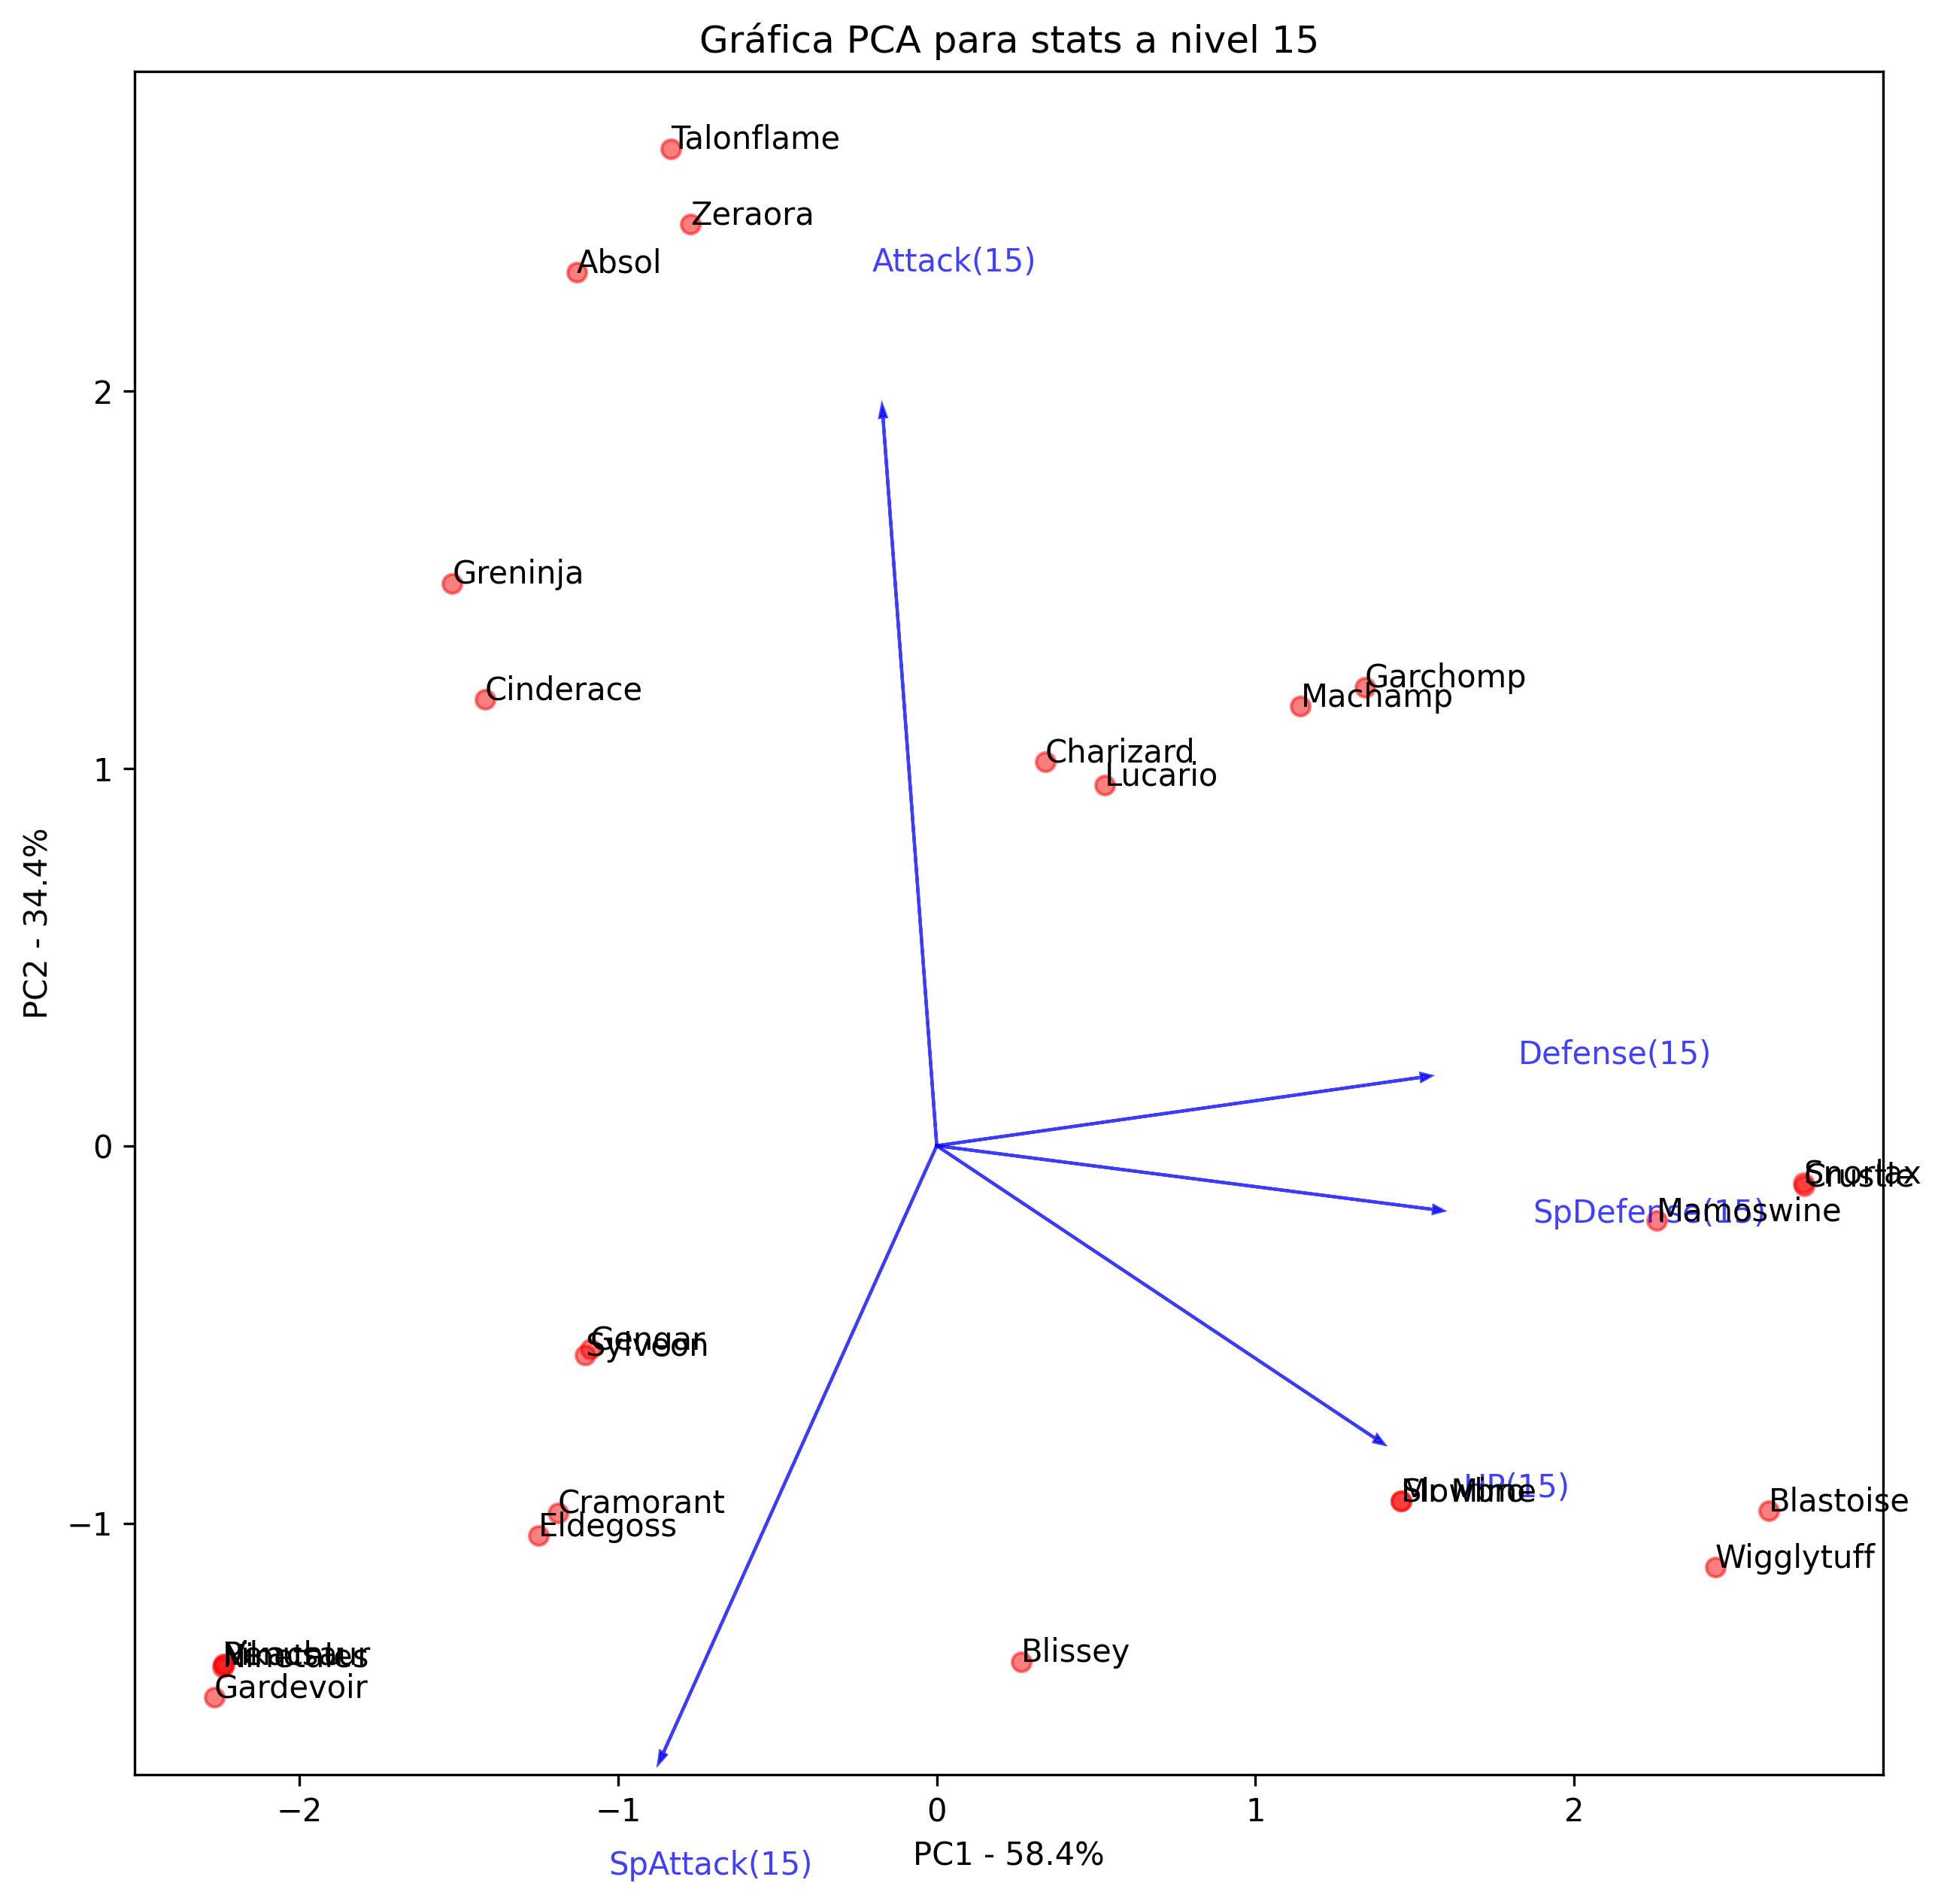

In [ ]:
# La gráfica de pca con las anotaciones de los personajes

plt.scatter(pca_df2.PC1, pca_df2.PC2,c='r', alpha=0.5)
plt.title('Gráfica PCA para stats a nivel 15')
plt.xlabel('PC1 - {0}%'.format(per_var2[0]))
plt.ylabel('PC2 - {0}%'.format(per_var2[1]))

ax = draw_vectors(pca_data2, pca2.components_, data2.columns.values)

for sample in pca_df2.index:
    plt.annotate(sample, (pca_df2.PC1.loc[sample], pca_df2.PC2.loc[sample]))


plt.show()